In [1]:
import imageio
import torch
from PIL import Image
from torchvision import transforms
import numpy as np
from matplotlib import pyplot as plt

In [2]:
################################################################################################################################
#Problem 3
################################################################################################################################

In [3]:
#Reading training data
import pandas as pd
housing = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/ECGR 4106 - Real Time Machine Learning/Intro to ML/Intro to ML/Homework/Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price'] 
Newtrain = housing[num_vars] 
Newtrain.head() 

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [6]:
#Price Predicition
t_area = torch.tensor(Newtrain['area'])
t_bedrooms = torch.tensor(Newtrain['bedrooms'])
t_bathrooms = torch.tensor(Newtrain['bathrooms'])
t_stories = torch.tensor(Newtrain['stories'])
t_parking = torch.tensor(Newtrain['parking'])
t_price = torch.tensor(Newtrain['price'])
#Normalized
t_areaN = t_area / max(Newtrain['area'])
t_bedroomsN = t_bedrooms / max(Newtrain['bedrooms'])
t_bathroomsN = t_bathrooms / max(Newtrain['bathrooms'])
t_storiesN = t_stories / max(Newtrain['stories'])
t_parkingN = t_parking / max(Newtrain['parking'])
def model(t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, w1, w2, w3, w4, w5, b):
    return w5*t_parking + w4*t_stories + w3*t_bathrooms + w2*t_bedrooms + w1*t_area + b

In [7]:
#Calculating the loss
def loss_fn(t_p, t_price):
    squared_diffs = (t_p - t_price)**2
    return squared_diffs.mean()

In [8]:
params = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0], requires_grad=True)

In [9]:
params.grad is None

True

In [10]:
loss = loss_fn(model(t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, *params), t_price)
loss.backward()
params.grad

tensor([-5.3383e+10, -2.9247e+07, -1.3220e+07, -1.8557e+07, -7.8404e+06,
        -9.5231e+06])

In [11]:
if params.grad is not None:
    params.grad.zero_()

In [12]:
def training_loop(n_epochs, learning_rate, params, t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, t_price):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # <1>
            params.grad.zero_()
        
        t_p = model(t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, *params) 
        loss = loss_fn(t_p, t_price)
        loss.backward()
        
        with torch.no_grad():  # <2>
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [29]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0], requires_grad=True), # <1> 
    t_area = t_areaN,
    t_bedrooms = t_bedroomsN,
    t_bathrooms = t_bathroomsN,
    t_stories = t_storiesN,
    t_parking = t_parkingN,
    t_price = t_price)

Epoch 500, Loss 2024805761024.000000
Epoch 1000, Loss 1863258734592.000000
Epoch 1500, Loss 1768051179520.000000
Epoch 2000, Loss 1704594898944.000000
Epoch 2500, Loss 1659788853248.000000
Epoch 3000, Loss 1627244199936.000000
Epoch 3500, Loss 1603242295296.000000
Epoch 4000, Loss 1585383211008.000000
Epoch 4500, Loss 1572023042048.000000
Epoch 5000, Loss 1561993281536.000000


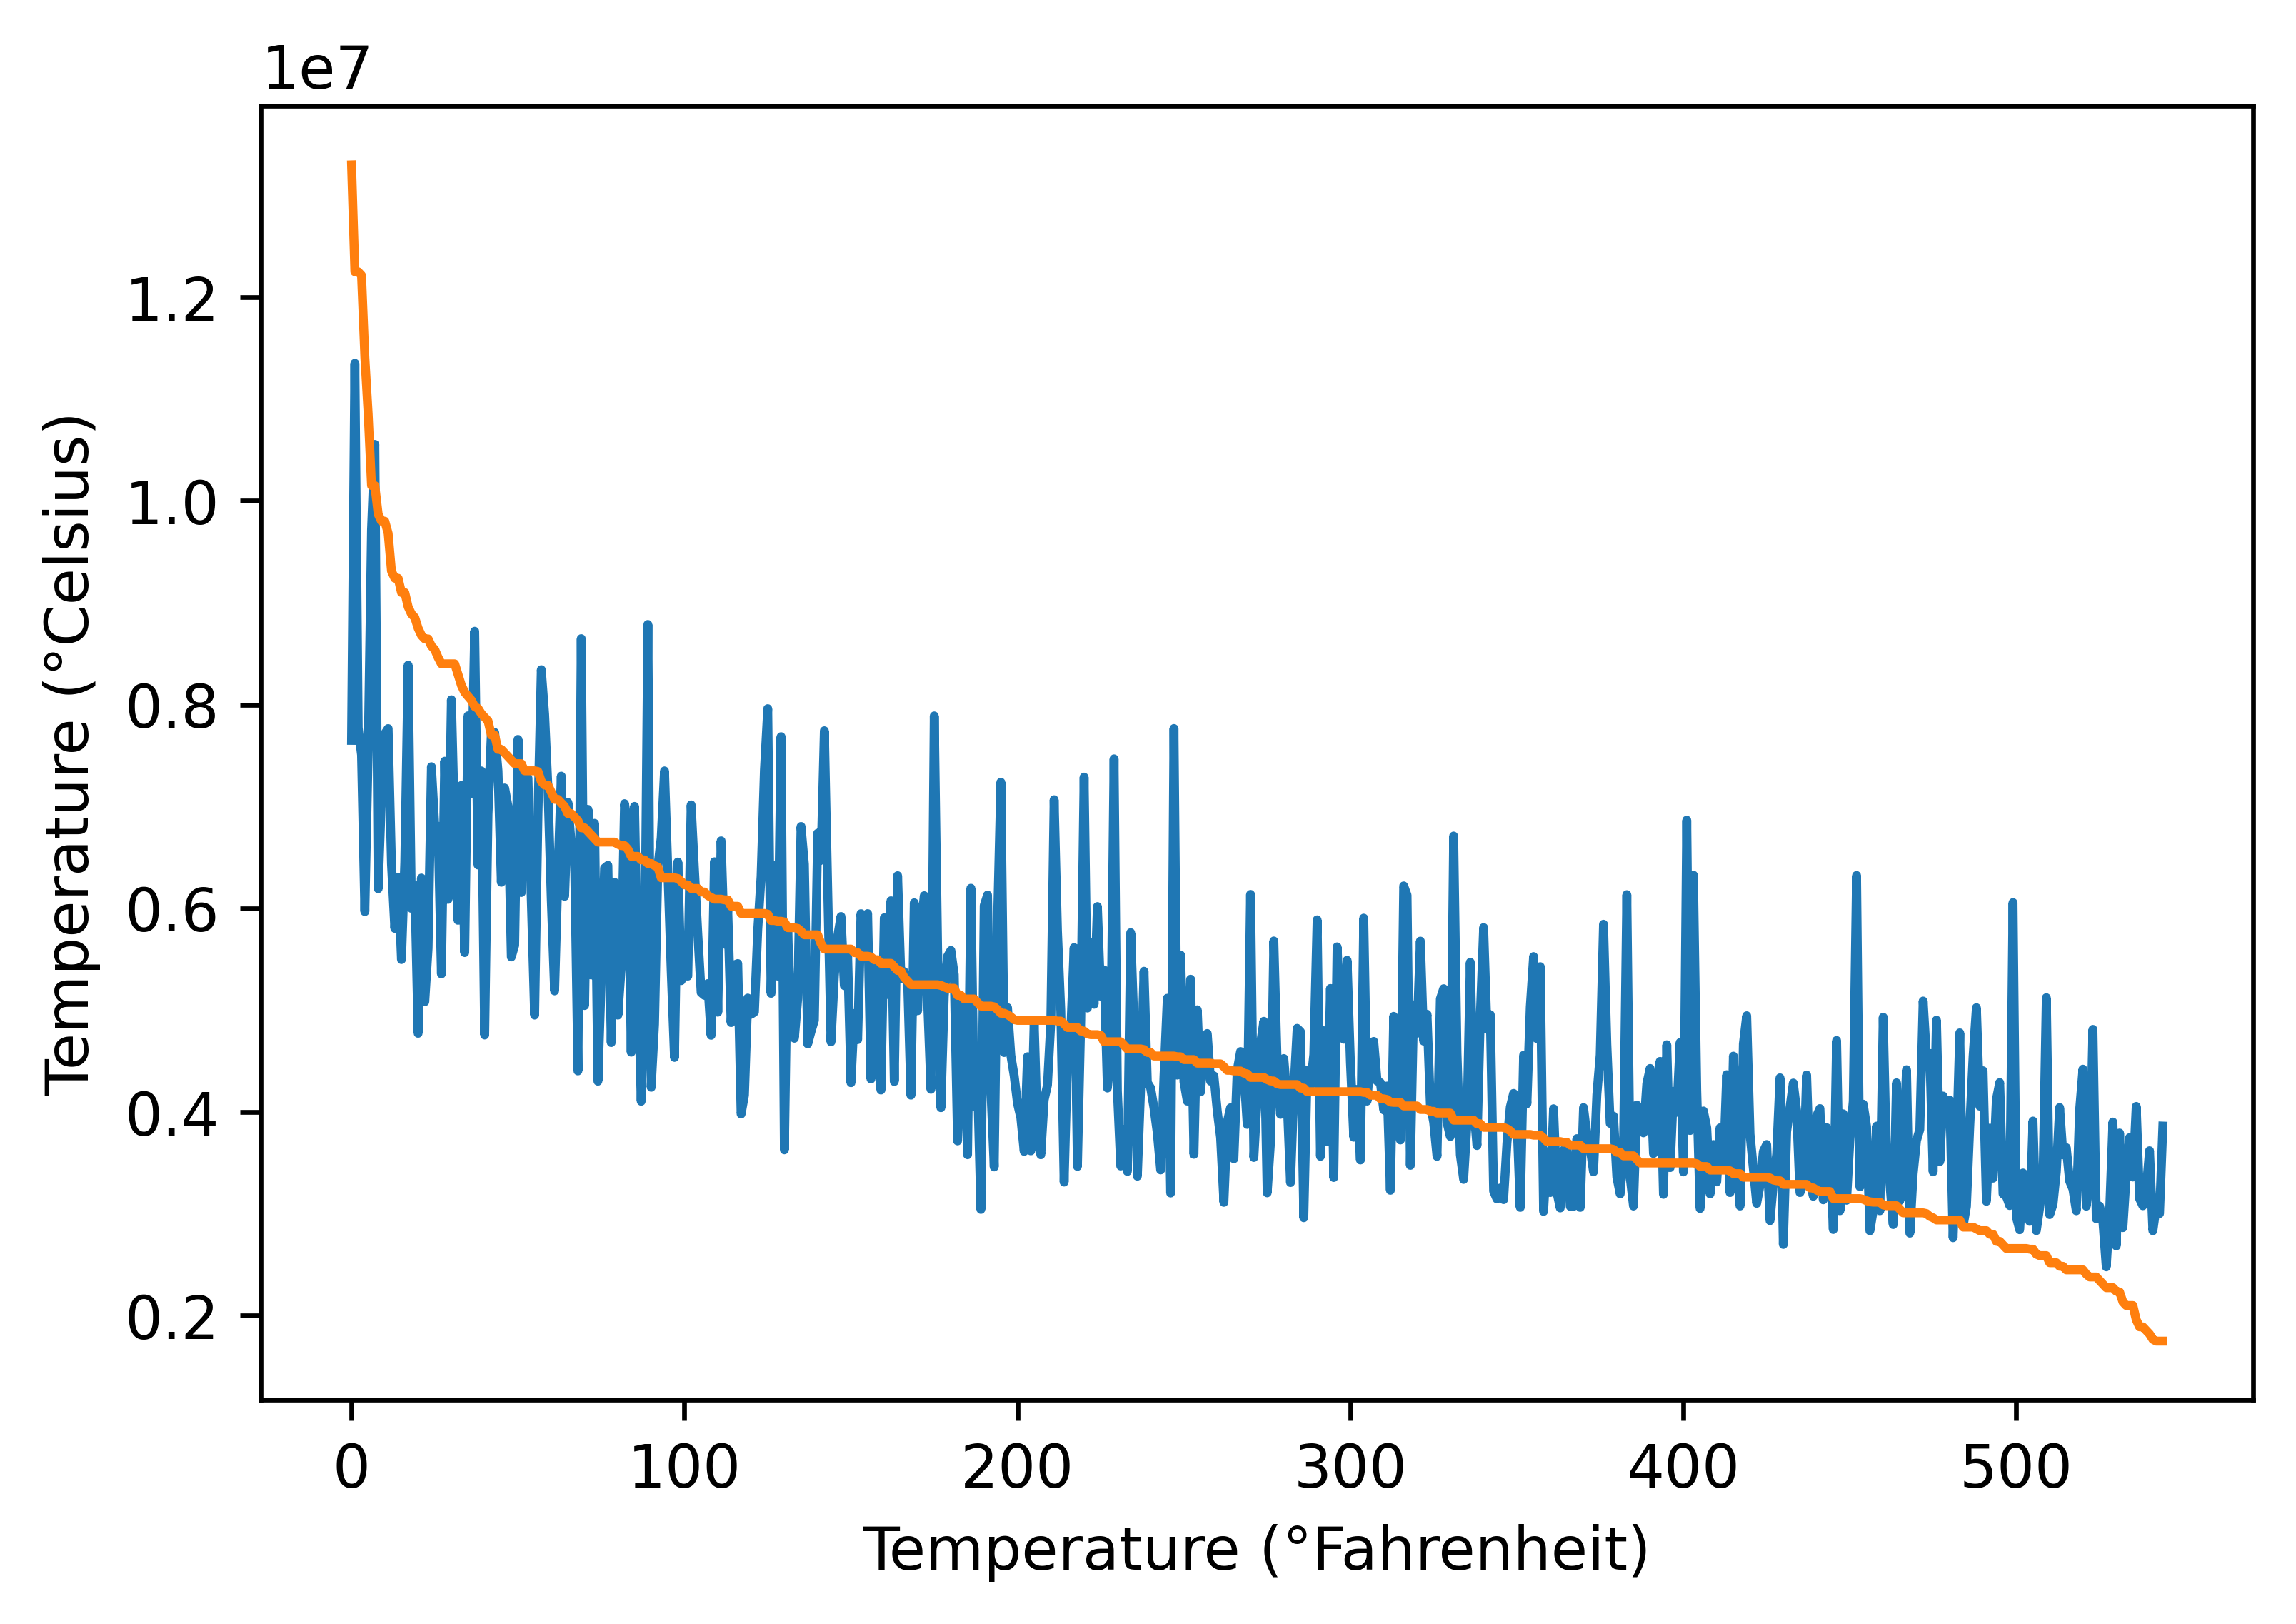

In [14]:
%matplotlib inline
#t_area, t_bedrooms, t_bathrooms, t_stories, t_parking
t_p = model(t_areaN, t_bedroomsN, t_bathroomsN, t_storiesN, t_parkingN, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_p.detach().numpy())
plt.plot(t_price)